### IMPORTANDO AS BIBLIOTECAS

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import plotly
import plotly.offline as py
import plotly.graph_objs as go
import numpy as np



In [ ]:
mpl.rcParams['figure.figsize'] = (15, 6)
mpl.rcParams['font.size'] = 22

### ANÁLISE INICIAL DO DATASET

In [ ]:
df = pd.read_csv("/content/BlackFriday (1).csv")

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
df.shape

(537577, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [ ]:
df['Purchase'].describe()

count    537577.000000
mean       9333.859853
std        4981.022133
min         185.000000
25%        5866.000000
50%        8062.000000
75%       12073.000000
max       23961.000000
Name: Purchase, dtype: float64

ANÁLISE DE DISTRIBUIÇÃO DA VARIÁVEL TARGET (PURCHASE)

<Axes: xlabel='Purchase', ylabel='Count'>

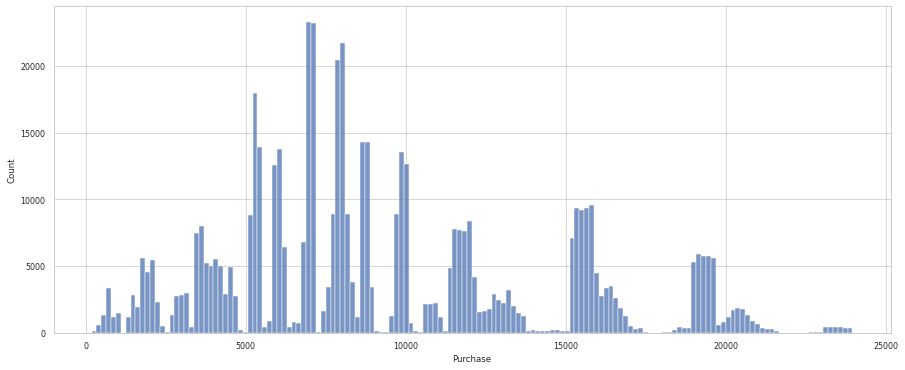

In [ ]:
sns.histplot(df['Purchase'])

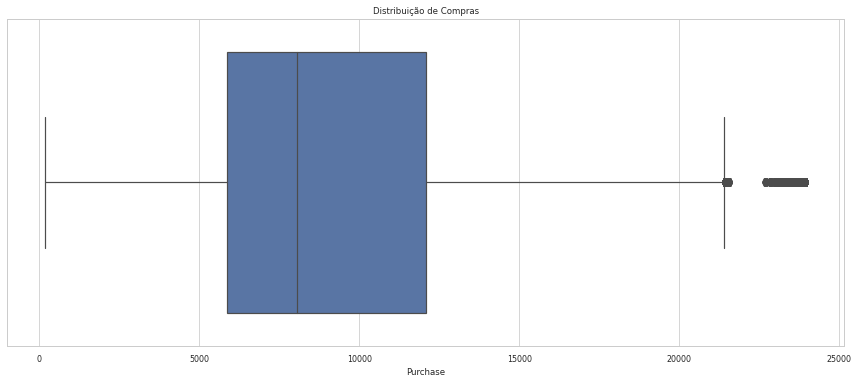

In [ ]:
sns.boxplot(x=df['Purchase'])


plt.title('Distribuição de Compras')
plt.xlabel('Purchase')
plt.show()

# ANÁLISE DEMOGRÁFICA

###Share de Gênero e Status Civil

In [ ]:
labels = ['Male','Female']
values = [df['Gender'].value_counts()[0], df['Gender'].value_counts()[1]]

trace = go.Pie(labels=labels, values=values)

py.iplot([trace])

labels = ['Solteiros','Casados']
values = [df['Marital_Status'].value_counts()[0], df['Marital_Status'].value_counts()[1]]

trace = go.Pie(labels=labels, values=values)

py.iplot([trace])

### Verificação de compras absolutas por Gender

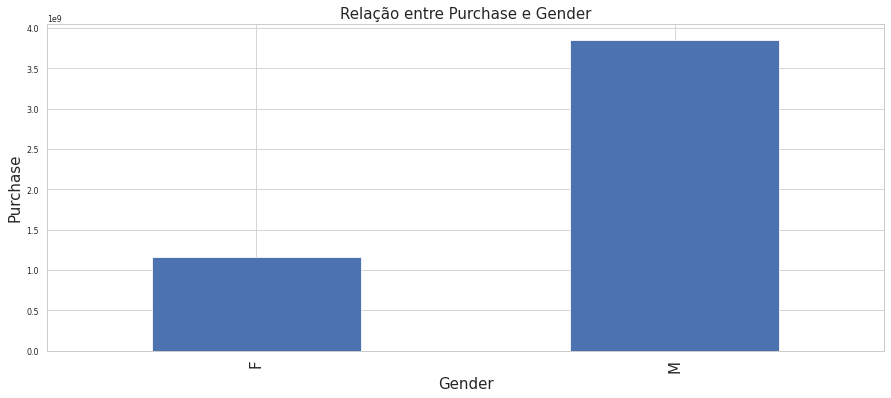

In [ ]:
#agrupando a a soma de compras por gênero

gender_sum = df.groupby('Gender')['Purchase'].sum()
gender_sum.plot(kind='bar')

plt.title('Relação entre Purchase e Gender')
plt.xlabel('Gender')
plt.ylabel('Purchase')
plt.rc('axes', titlesize=15)
plt.rc('axes', labelsize=15)
plt.rc('xtick', labelsize=15)
plt.rc('legend', fontsize=15)
plt.show()

###Média de compras por gênero

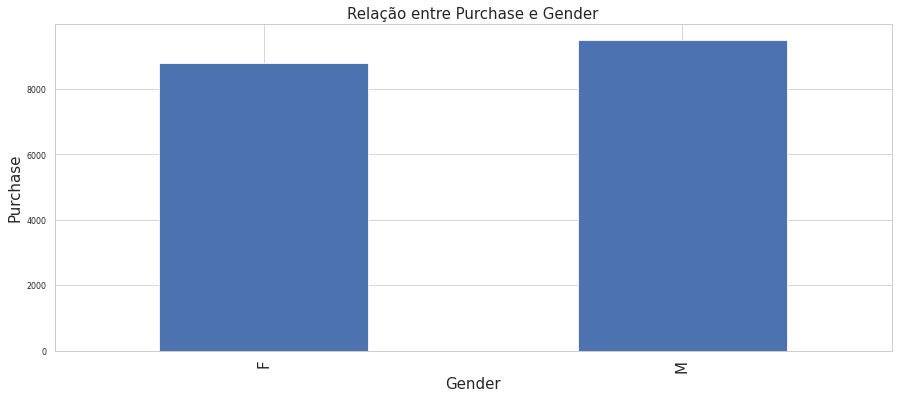

In [ ]:
#agrupando a a média de compras por gênero

gender_means = df.groupby('Gender')['Purchase'].mean()
gender_means.plot(kind='bar')

plt.title('Relação entre Purchase e Gender')
plt.xlabel('Gender')
plt.ylabel('Purchase')
plt.rc('axes', titlesize=15)
plt.rc('axes', labelsize=15)
plt.rc('xtick', labelsize=15)
plt.rc('legend', fontsize=15)
plt.show()

### Compras por Gênero e Cidade

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:712: UserWarning:

Using the barplot function without specifying `order` is likely to produce an incorrect plot.



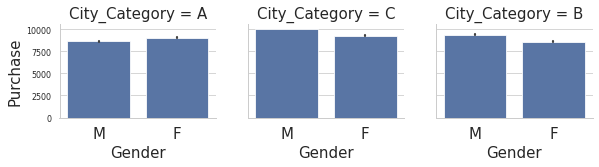

In [ ]:
#Colunas para comparar o gênero em diferentes cidades
g = sns.FacetGrid(df,col="City_Category")
g.map(sns.barplot, "Gender", "Purchase");
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("paper", font_scale=0.9)

###Compras absolutas por estado civil

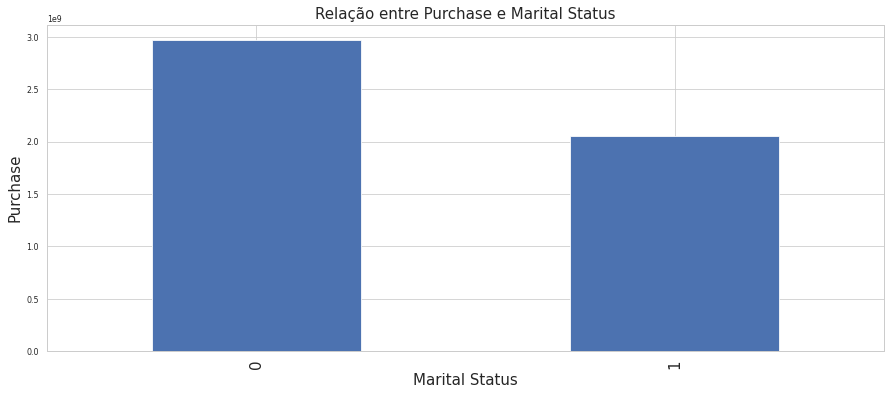

In [ ]:
#agrupando a a soma de compras por estado civil
marital_sum = df.groupby('Marital_Status')['Purchase'].sum()
marital_sum.plot(kind='bar')

plt.title('Relação entre Purchase e Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Purchase')
plt.rc('axes', titlesize=15)
plt.rc('axes', labelsize=15)
plt.rc('xtick', labelsize=15)
plt.rc('legend', fontsize=15)
plt.show()

### Média de compras por estado civil

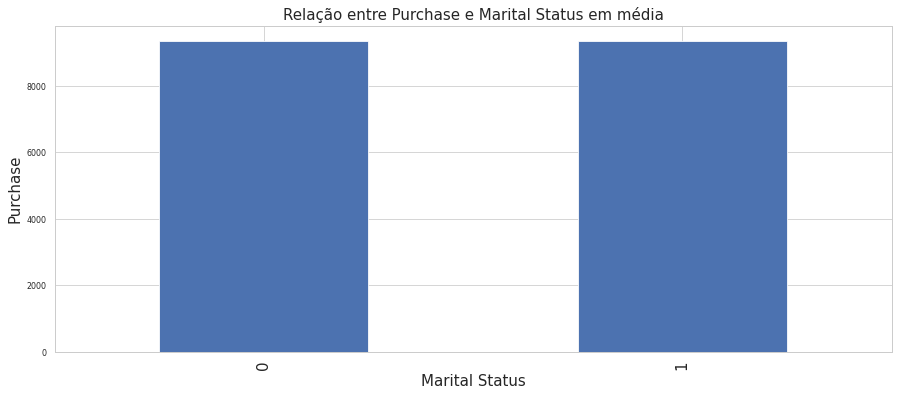

In [ ]:
#agrupando a a média de compras por estado civil
marital_means = df.groupby('Marital_Status')['Purchase'].mean()
marital_means.plot(kind='bar')

plt.title('Relação entre Purchase e Marital Status em média')
plt.xlabel('Marital Status')
plt.ylabel('Purchase')
plt.rc('axes', titlesize=15)
plt.rc('axes', labelsize=15)
plt.rc('xtick', labelsize=15)
plt.rc('legend', fontsize=15)
plt.show()

### Distribuição de compras por idade

<Axes: xlabel='Age', ylabel='Purchase'>

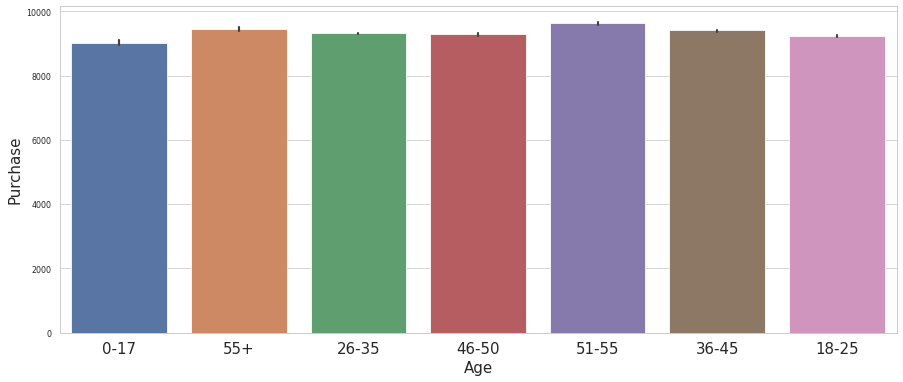

In [ ]:
#barplot para verificar compras por idade
sns.barplot(x='Age', y='Purchase', data=df, label="Purchase by Age")

<Axes: xlabel='Age', ylabel='Purchase'>

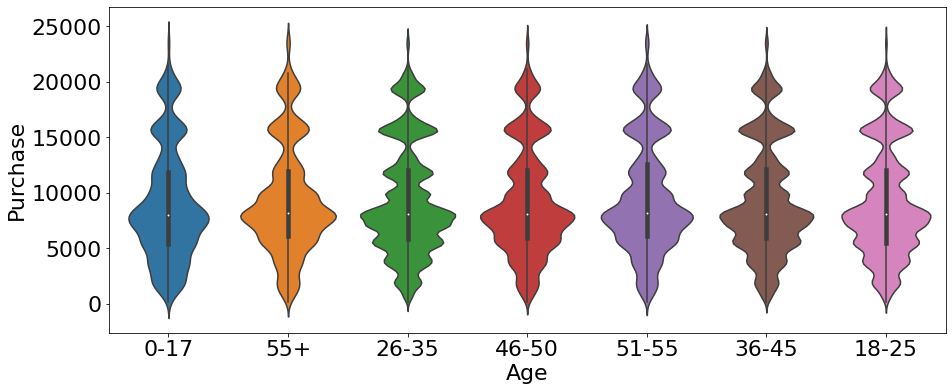

In [ ]:
# Visualizando por categorias
sns.violinplot(x="Age", y="Purchase", label = "Distribuição de compras por idade", data=df)

# Análise de produtos




###Share de produtos mais comprados

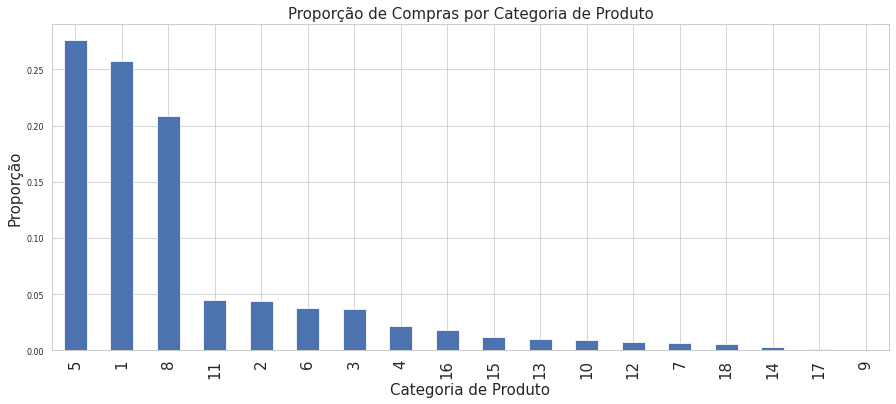

In [ ]:
#Selecionando o value_counts em porcentagem do Product_Category
category_counts = df['Product_Category_1'].value_counts(normalize=True)

category_counts.plot(kind='bar')
plt.title('Proporção de Compras por Categoria de Produto')
plt.xlabel('Categoria de Produto')
plt.ylabel('Proporção')
plt.show()

### Correlação entre variáveis numéricas

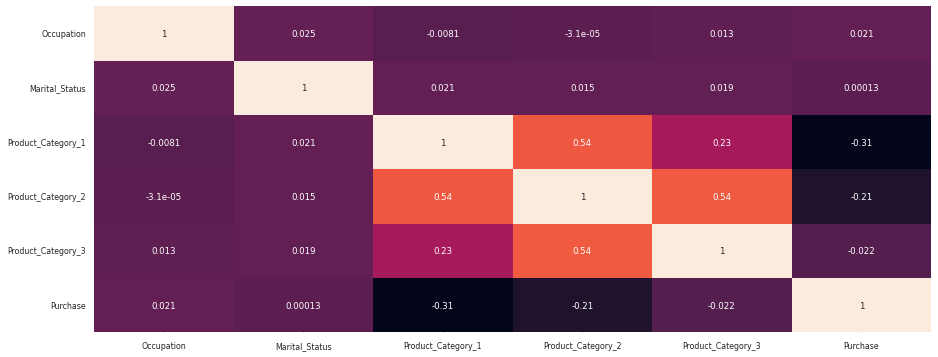

In [ ]:
# Selecionando apenas as variáveis numéricas
num_vars = ['Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase']
df_num = df[num_vars]

# Gerando o heatmap
sns.heatmap(df_num.corr(), annot=True, cbar=False)

# Exibindo o gráfico
plt.show()

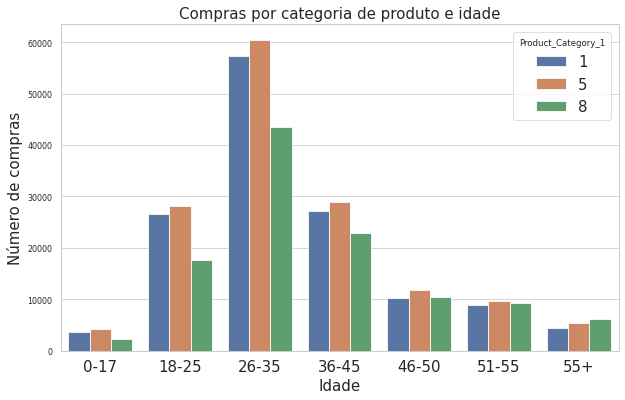

In [ ]:
category_counts = df['Product_Category_1'].value_counts(normalize=True)

# Filtrando apenas as categorias de produto que representam mais de 10% das compras
relevant_categories = category_counts[category_counts >= 0.1].index.tolist()

# Filtrando os dados apenas para as categorias de produto relevantes
df_relevant = df[df['Product_Category_1'].isin(relevant_categories)]

# Agrupando as compras por idade e categoria de produto
age_category_count = df_relevant.groupby(['Age', 'Product_Category_1'])['User_ID'].count().reset_index()
age_category_count = age_category_count.rename(columns={'User_ID': 'Count'})

# Gerando o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Age', y='Count', hue='Product_Category_1', data=age_category_count)

# Configurando o título e os rótulos dos eixos
plt.title('Compras por categoria de produto e idade')
plt.xlabel('Idade')
plt.ylabel('Número de compras')

# Exibindo o gráfico
plt.show()

#Conclusão

### Análise de dataset

O dataset é formado por, no total, 12 colunas, sendo a última (Purchase) a variável dependente.

De acordo com a base de dados vimos que há uma concentração maior de compras no valor entre 5.000 a 10.000.

Além disso, com a distribuição e medidas de centralidade analisanos no boxplot, vimos que os outliers acontecem quando as compras ultrapassam 230.000.


### Análise de público


Também é possível analisar que 75% do público desta base é do gênero Masculino, e os outros 25% do gênero Feminino.

Obviamente, por ser uma concentração maior do público masculino, há um volumo de compras e valores maiores para este gênero. Porém, quando olhamos as médias proporcionais, há um balanceamento praticamente igual entre os dois gêneros. Portanto, de acordo com a proporção da base, os dois gêneros possuem valor de compra semelhantes.

Olhando também para a variável de Estado Civil, vemos que há uma concentração de 59% para o público solteiro (0), e 41% para o público casado (1).
Da mesma forma, quando olhamos em compras absolutas em forma de soma, o público 0 possui um valor maior. Mas quando olhamos na média sobre a proporção do tamanho do público, há uma igualidade entre as compras.

Quando olhamos por idade, o público de 0-17 anos, possui um volume maior de compras abaixo de 5.000.

Já quando queremos olhar para compras acima de 150.000, os públicos de 26 a 45 são predominantes.

Os outliers citados (acima de 230.000) são quase que em sua totalidade, pertencentes ao público acima de 55 anos.

O gênero masculino é predominante nas cidades B e C, porém, na cidade A, possui uma quantidade maior do público Feminino.

### Análise de produtos

As categorias de produtos mais compradas são, respectivamente, 5, 1 e 8.

Dessas categorias de produtos, o público que mais os compram são de 26-35 anos. Porém, já começa a apresentar um comportamento alto de compras destes produtos a partir dos 18 anos, e vai até os 45 anos de idade.